<a href="https://colab.research.google.com/github/Henrxque/Analise_exploratoria_IMDB/blob/main/Projeto_IMDB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size = 5 font face = "Helvetica "> Análise exploratória: Bilheteria e Top 1000 filmes pelo IMDB


<br>

##O que é Análise exploratória?

Análise exploratória de dados, é utilizada por Cientistas de Dados para investigar e analisar um conjunto de dados abstratos e então tirar conclusões que podem ajudar na tomada de decisão ou na obtenção de uma informação importante. Na Análise exploratória, o Cientista de Dados consegue identificar Padrões, anomalias e verificar suposições, utilizando técnicas de controle e manipulação de Dados.

<br>


---

<br>


##Sobre o Projeto

Imagine que trabalhamos em um projeto para uma grande produtora de Filmes que deseja lançar tanto um filme bem recebido pela crítica, um filme bem recebido pelo público e um filme sucesso de bilheteria. 

Mas para isso precisamos definir um critério para auxiliar na tomada de decisão: 

* Análise sobre a Bilheteria, para definir um filme de sucesso. 
* Análise sobre a nota do público no IMDB. 
* Análise sobre a nota da crítica (METASCORE) pelo IMDB. 



</font>






##Perguntas a serem respondidas:


Início:

* Top 10 filmes em Bilheteria
* Top 10 filmes em avaliação no IMDB
* Top 10 filmes em avaliação com o Metascore 

Bilheteria: 

* O Gênero de um filme impacta na bilheteria?
* Quais os gêneros mais rentáveis?

Avaliação no IMDB:
* Qual é realmente os melhores filmes do IMDB, juntando a nota do público com a nota da crítica?
* Qual a média de avaliação por gênero?
* Entre os atores principais, quais estão presente nos melhores filmes?




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from google.colab import drive
import zipfile

In [ ]:
drive.mount('/content/drive') #acessando o Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
boxoffice = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotop1000.tsv', sep='\t', header=0)
genres = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/boxofficemojotopgenres.tsv', sep='\t', header=0)
movies = pd.read_csv('/content/drive/MyDrive/Dataset/Movies/top1000imdb.csv')

In [ ]:
boxoffice.head(3)

,Rank,Title,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %,Year
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019
2,3,Titanic,2201647264,659363944,0.30,1542283320,0.70,1997


In [ ]:
genres.head(3)

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8513688318,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,68146286235,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,60041261115,750,Star Wars: Episode VII - The Force Awakens,936662225


In [ ]:
movies.head(3)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M


In [ ]:
genres['Total'] = genres['Total'].astype(float)
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Genre           245 non-null    object 
 1   Total           245 non-null    float64
 2   Titles          245 non-null    int64  
 3   #1 Title        245 non-null    object 
 4   Lifetime Gross  245 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ KB


In [ ]:
print('O Dataset de Bilheteria possui possui %s linhas e %s colunas' % (boxoffice.shape[0], boxoffice.shape[1]))
print('O Dataset de Gêneros (Box Office) possui possui %s linhas e %s colunas' % (genres.shape[0], genres.shape[1]))
print('O Dataset de Filmes no IMDB possui possui %s linhas e %s colunas' % (movies.shape[0], movies.shape[1]))


O Dataset de Bilheteria possui possui 1000 linhas e 8 colunas
O Dataset de Gêneros (Box Office) possui possui 245 linhas e 5 colunas
O Dataset de Filmes no IMDB possui possui 1000 linhas e 16 colunas


## Data Cleaning


Vamos limpar alguns dados dos nossos Datasets, que não serão necessários durante o projeto. Dentro do Dataset de gêneros vamos remover a coluna #1 Title e Lifetime Gross pois são informações que já temos no Dataset de Bilheteria. 

No Dataset de Filmes vamos remover DETAIL ABOUT MOVIE\n	e certificate que basicamente é a Sinopse do filme e a classificação indicativa, pois acredito que pode não ter sentido dentro do nosso projeto. 


<br>


In [ ]:
genres.head()

,Genre,Total,Titles,#1 Title,Lifetime Gross
0,Heroine,8.513688e+09,82,Star Wars: Episode VII - The Force Awakens,936662225
1,Adventure,6.814629e+10,877,Star Wars: Episode VII - The Force Awakens,936662225
2,Supernatural,6.004126e+10,750,Star Wars: Episode VII - The Force Awakens,936662225
3,IMAX,5.624990e+10,372,Star Wars: Episode VII - The Force Awakens,936662225
4,3D,5.074550e+10,394,Star Wars: Episode VII - The Force Awakens,936662225


In [ ]:
genres.drop(['#1 Title','Lifetime Gross'], axis = 1, inplace = True)

In [ ]:
genres.head()

,Genre,Total,Titles
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877
2,Supernatural,6.004126e+10,750
3,IMAX,5.624990e+10,372
4,3D,5.074550e+10,394


:Encontrei no Dataset os "Gêneros IMAX e 3D" no top 4 de Gêneros, isso pode impactar negativamente nossas análises pois, IMAX e 3D não são gêneros de filme, e sim um formato de assistir o filme no Cinema. Portanto vou excluí-los do Dataset

In [ ]:
genres.drop([3,4], inplace= True)
genres.head()

,Genre,Total,Titles
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877
2,Supernatural,6.004126e+10,750
5,Comic Book Adaptation,2.566524e+10,181
6,Invasion,7.243530e+09,58


In [ ]:
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,12A,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,12A,201 min,"Action, Adventure, Drama",9.0,94.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,15,195 min,"Biography, Drama, History",9.0,94.0,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


:Removi as colunas "DETAIL ABOUT MOVIE" e "Ceriticate" pois acredito não serem úteis para o projeto. 

In [ ]:
movies.drop(['DETAIL ABOUT MOVIE\n','certificate'], axis = 1, inplace = True)
movies.head()

,ranking of movie\r\n,movie name\r\n,Year,runtime,genre,RATING,metascore,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


## Renomeando as colunas. 

Para facilitar o entendimento aos leitores, irei alterar os nomes das colunas. 

In [ ]:
boxoffice.columns = ['Rank', 'Filme', 'Bilheteria_Mundial', 'Bilheteria_Domestic','%Domestic','Bilheteria_Ext','%Ext','Ano']
boxoffice.head(2)

,Rank,Filme,Bilheteria_Mundial,Bilheteria_Domestic,%Domestic,Bilheteria_Ext,%Ext,Ano
0,1,Avatar,2847246203,760507625,0.27,2086738578,0.73,2009
1,2,Avengers: Endgame,2797501328,858373000,0.31,1939128328,0.69,2019


In [ ]:
movies.columns = ['Rank', 'Filme', 'Ano', 'Tempo','Genero','Nota','Metascore','Diretor','Ator1','Ator2','Ator3','Ator4','Votos','Bilheteria_Domestic']
movies.head(2)

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M


In [ ]:
genres.columns = ['Genero','Bilheteria_Genero','Qtd_Filmes']
genres.head(2)

,Genero,Bilheteria_Genero,Qtd_Filmes
0,Heroine,8.513688e+09,82
1,Adventure,6.814629e+10,877


## Dicionário de Dados


Boxoffice (Bilheteria)
* Rank: Indica o ranking dos filmes com maiores bilheteria. 
* Filme: Nome do Filme.
* Bilheteria Mundial: Soma da Bilheteria de todo mundo.
* Bilheteria_domestic: Soma de Bilheteria Doméstica, ou seja, do país que o filme foi realizado. 
* %Domestic: Quantos % de Bilheteria Domestica equivale na soma Mundial. 
* Bilheteria_Ext: Soma de Bilheteria restante do mundo. 
* %Ext: Quantos % de Bilheteria Extrangeira equivale na soma Mundial. 
* Ano: Ano de lançamento do Filme. 


Movies (Filmes)
* Rank: Ranking do filme entre os 1000 melhores filmes do IMDB.
* Filme: Nome do Filme
* Tempo: Tempo do Filme. 
* Genero: Genero do filme. 
* Nota: Média de Notas do Público para o filme.
* Metascore: Média de nota da Crítica pelo Metascore.
* Diretor: Nome do Diretor. 
* Ator[N]: Artistas envolvidos no filme.


Genres (Gêneros)
* Genero: Genero do Filme. 
* Bilheteria_Genero: SOma de bilheteria para aquele Genero.
* Qtd_Filmes: Soma de filmes de determinado Genero.

Explorando o Dataset, identifiquei que alguns filmes não possuem nota no Metascore, isso devido a aparentemente esses filmes serem poucos conhecidos ao redor do mundo, e serem segmentados demais a apenas um País, portanto vamos remover do Dataset pois pode impactar em nosso resultado. 

In [ ]:
movies.info() #Identificando 837 filmes apenas com avaliação no IMDB ao invés de 1000. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [ ]:
movies.query("Metascore != Metascore") #fiz uma query para identificar o que estava acontecendo, e identifiquei muitos filmes Segmentados, geralmente da Índia ou filmes poucos conhecidos, o que não faz sentido para nossa Case de "Filmes de Sucesso" ao redor do mundo. 

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
7,8,Jai Bhim,-2021,164 min,"Crime, Drama, Mystery",8.9,NaN,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vijayan,"191,329",NaN
15,16,Soorarai Pottru,-2020,153 min,Drama,8.7,NaN,Sudha Kongara,Suriya,Paresh Rawal,Aparna Balamurali,Urvashi,"111,090",NaN
34,35,Asuran,-2019,141 min,"Action, Drama",8.5,NaN,Vetrimaaran,Dhanush,Manju Warrier,Prakash Raj,Pasupathy,"26,935",NaN
38,39,K.G.F: Chapter 2,-2022,168 min,"Action, Crime, Drama",8.5,NaN,Prashanth Neel,Yash,Sanjay Dutt,Raveena Tandon,Srinidhi Shetty,"109,453",NaN
39,40,Sardar Udham,-2021,164 min,"Biography, Crime, Drama",8.5,NaN,Shoojit Sircar,Vicky Kaushal,Shaun Scott,Stephen Hogan,Amol Parashar,"39,965",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,Belle de Jour,-1967,100 min,"Drama, Romance",7.7,NaN,Luis Buñuel,Catherine Deneuve,Jean Sorel,Michel Piccoli,Geneviève Page,"44,120",$0.03M
898,899,Breathless,-1960,90 min,"Crime, Drama",7.7,NaN,Jean-Luc Godard,Jean-Paul Belmondo,Jean Seberg,Daniel Boulanger,Henri-Jacques Huet,"80,234",$0.34M
903,904,Key Largo,-1948,100 min,"Action, Crime, Drama",7.7,NaN,John Huston,Humphrey Bogart,Edward G. Robinson,Lauren Bacall,Lionel Barrymore,"40,559",NaN
930,931,Cell 211,-2009,113 min,"Action, Crime, Drama",7.6,NaN,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,"67,334",NaN


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   object 
 1   Filme                1000 non-null   object 
 2   Ano                  1000 non-null   object 
 3   Tempo                1000 non-null   object 
 4   Genero               1000 non-null   object 
 5   Nota                 1000 non-null   float64
 6   Metascore            837 non-null    float64
 7   Diretor              1000 non-null   object 
 8   Ator1                1000 non-null   object 
 9   Ator2                1000 non-null   object 
 10  Ator3                1000 non-null   object 
 11  Ator4                1000 non-null   object 
 12  Votos                1000 non-null   object 
 13  Bilheteria_Domestic  820 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [ ]:
movies.dropna(subset=['Metascore'], inplace=True)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 837 non-null    object 
 1   Filme                837 non-null    object 
 2   Ano                  837 non-null    object 
 3   Tempo                837 non-null    object 
 4   Genero               837 non-null    object 
 5   Nota                 837 non-null    float64
 6   Metascore            837 non-null    float64
 7   Diretor              837 non-null    object 
 8   Ator1                837 non-null    object 
 9   Ator2                837 non-null    object 
 10  Ator3                837 non-null    object 
 11  Ator4                837 non-null    object 
 12  Votos                837 non-null    object 
 13  Bilheteria_Domestic  738 non-null    object 
dtypes: float64(2), object(12)
memory usage: 98.1+ KB


In [ ]:
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   int64  
 3   Bilheteria_Domestic  1000 non-null   int64  
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [ ]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genero             243 non-null    object 
 1   Bilheteria_Genero  243 non-null    float64
 2   Qtd_Filmes         243 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.6+ KB


## Análise Exploratória e Data Visualization

#### Q1: Top 10

Neste primeiro questionamento bem simples, precisamos demonstrar o Top 10 de cada Dataset, ou seja, top 10 Filmes no IMDB, Filmes no Metascore,  Bilheteria e Bilheteria dos Gêneros

##### Top 10 Filmes no IMDB

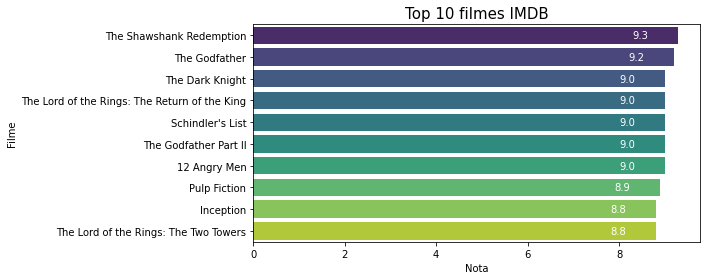

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Top 10 filmes IMDB', fontsize=15)
filmes = sns.barplot(x='Nota',y='Filme',data= movies.head(10),palette='viridis')

for p in filmes.patches:
    width = p.get_width()    #obter a largura da barra
    filmes.text(width + -1, #posicionei o texto em -1 para aparecer dentro da barra
            p.get_y() + p.get_height() / 2, # obtive a posição do Y + posição do X  / 2
            '{:1.1f}'.format(width), # Casas decimais
            ha = 'left',   # Ordenar pela horizontal
            va = 'center',# Ordenar pela vertical
            color='white') #coloquei a cor branca por causa das cores do plot
plt.show()


##### Top Filmes no METASCORE


Identifiquei nesse Dataset que o top 10 do Metascore, todos os filmes são compostos pela nota máxima, ou seja 100. E há mais filmes com nota 100 do que do que apenas 10, portanto o questionamento que eu quero chegar nesse passo é: Quais são os filmes com nota máxima no Metascore. Mais tarde vamos querer analisar aa nota do Metascore e a nota do IMDB, portanto seria interessante termos a distribuição dessas notas no Metascore. 

In [ ]:
max_meta = movies.query("Metascore >= 100")

In [ ]:
max_meta

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
55,56,Rear Window,-1954,112 min,"Mystery, Thriller",8.5,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,"482,791",$36.76M
56,57,Casablanca,-1942,102 min,"Drama, Romance, War",8.5,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,"562,032",$1.02M
121,122,Lawrence of Arabia,-1962,218 min,"Adventure, Biography, Drama",8.3,100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,"289,377",$44.82M
125,126,Vertigo,-1958,128 min,"Mystery, Romance, Thriller",8.3,100.0,Alfred Hitchcock,James Stewart,Kim Novak,Barbara Bel Geddes,Tom Helmore,"396,060",$3.20M
131,132,Citizen Kane,-1941,119 min,"Drama, Mystery",8.3,100.0,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,"436,067",$1.59M
273,274,Three Colours: Red,-1994,99 min,"Drama, Mystery, Romance",8.1,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,"101,965",$4.04M
286,287,Fanny and Alexander,-1982,188 min,Drama,8.1,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,"63,380",$4.97M
435,436,The Leopard,-1963,186 min,"Drama, History",8.0,100.0,Luchino Visconti,Burt Lancaster,Alain Delon,Claudia Cardinale,Paolo Stoppa,"25,747",NaN
446,447,Sweet Smell of Success,-1957,96 min,"Drama, Film-Noir",8.0,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,"31,683",NaN


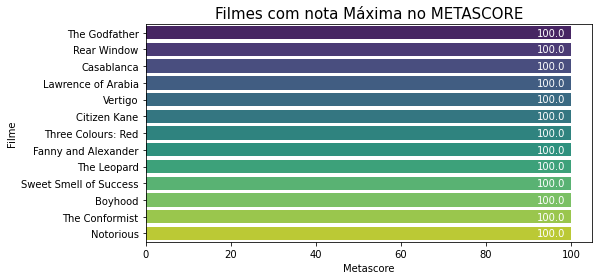

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Filmes com nota Máxima no METASCORE', fontsize=15)
metascore = sns.barplot(x='Metascore',y='Filme',data= max_meta, palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -8, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()


##### Top 10 Maiores Bilheterias da História

In [ ]:
boxoffice['Bilheteria_Mundial'] = boxoffice['Bilheteria_Mundial'].astype(float)
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   float64
 3   Bilheteria_Domestic  1000 non-null   int64  
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


In [ ]:
boxoffice['Bilheteria_Domestic'] = boxoffice['Bilheteria_Domestic'].astype(float)
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1000 non-null   int64  
 1   Filme                1000 non-null   object 
 2   Bilheteria_Mundial   1000 non-null   float64
 3   Bilheteria_Domestic  1000 non-null   float64
 4   %Domestic            1000 non-null   float64
 5   Bilheteria_Ext       1000 non-null   int64  
 6   %Ext                 1000 non-null   float64
 7   Ano                  1000 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [ ]:
pivot_boxoffice = pd.pivot_table(boxoffice, index = ['Filme'])

In [ ]:
boxoffice.head(10).style.format({'Bilheteria_Mundial': ' U$ {:,.2f}'})

,Rank,Filme,Bilheteria_Mundial,Bilheteria_Domestic,%Domestic,Bilheteria_Ext,%Ext,Ano
0,1,Avatar,"U$ 2,847,246,203.00",760507625.000000,0.270000,2086738578,0.730000,2009
1,2,Avengers: Endgame,"U$ 2,797,501,328.00",858373000.000000,0.310000,1939128328,0.690000,2019
2,3,Titanic,"U$ 2,201,647,264.00",659363944.000000,0.300000,1542283320,0.700000,1997
3,4,Star Wars: Episode VII 0 The Force Awakens,"U$ 2,069,521,700.00",936662225.000000,0.450000,1132859475,0.550000,2015
4,5,Avengers: Infinity War,"U$ 2,048,359,754.00",678815482.000000,0.330000,1369544272,0.670000,2018
5,6,Spider0Man: No Way Home,"U$ 1,832,170,405.00",772170405.000000,0.420000,1060000000,0.580000,2021
6,7,Jurassic World,"U$ 1,670,516,444.00",652385625.000000,0.390000,1018130819,0.610000,2015
7,8,The Lion King,"U$ 1,662,899,439.00",543638043.000000,0.330000,1119261396,0.670000,2019
8,9,The Avengers,"U$ 1,518,815,515.00",623357910.000000,0.410000,895457605,0.590000,2012
9,10,Furious 7,"U$ 1,515,341,399.00",353007020.000000,0.230000,1162334379,0.770000,2015


In [ ]:
boxoffice[['Filme','Bilheteria_Mundial']].head(10).style.format({'Bilheteria_Mundial': ' U$ {:,.2f}'})

,Filme,Bilheteria_Mundial
0,Avatar,"U$ 2,847,246,203.00"
1,Avengers: Endgame,"U$ 2,797,501,328.00"
2,Titanic,"U$ 2,201,647,264.00"
3,Star Wars: Episode VII 0 The Force Awakens,"U$ 2,069,521,700.00"
4,Avengers: Infinity War,"U$ 2,048,359,754.00"
5,Spider0Man: No Way Home,"U$ 1,832,170,405.00"
6,Jurassic World,"U$ 1,670,516,444.00"
7,The Lion King,"U$ 1,662,899,439.00"
8,The Avengers,"U$ 1,518,815,515.00"
9,Furious 7,"U$ 1,515,341,399.00"


##### Top 10 Generos com maior Bilheteria

In [ ]:
genres.sort_values(by=['Bilheteria_Genero'], ascending = False).head(10).style.format({'Bilheteria_Genero': ' U$ {:,.2f}'})

,Genero,Bilheteria_Genero,Qtd_Filmes
9,Adaptation,"U$ 72,848,144,854.00",963
1,Adventure,"U$ 68,146,286,235.00",877
2,Supernatural,"U$ 60,041,261,115.00",750
23,Animation,"U$ 32,031,484,157.00",709
5,Comic Book Adaptation,"U$ 25,665,243,979.00",181
7,Superhero,"U$ 24,227,315,180.00",146
22,CGI Animation,"U$ 23,828,773,930.00",190
41,Past,"U$ 21,805,840,750.00",660
35,Book Adaptation,"U$ 18,128,512,073.00",228
19,Animal,"U$ 15,273,537,631.00",238


In [ ]:
g = genres.sort_values(by=['Bilheteria_Genero'], ascending = False)##.head(10).style.format({'Bilheteria_Genero': ' U$ {:,.2f}'})

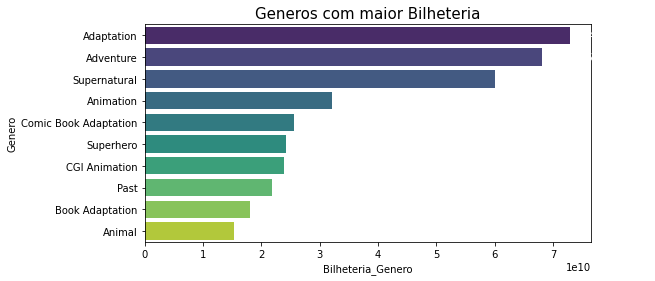

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Generos com maior Bilheteria', fontsize=15)
metascore = sns.barplot(x= 'Bilheteria_Genero',y='Genero',data= g.head(10), palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -8, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()

#### Q2: Conclusões em Bilheteria

Após a elaboração dos top 10, vamos para as conclusões em Bilheteria


##### Conclusão 1 

Os Gêrenos de Adaptações são os que mais figuram o top 10, com o gênero "Adaptação" (que consolida todos os tipos de adaptações sendo o que mais fez bilheteria na história. 

Filmes de adaptação de Quadrinhos e Super Heróis também aparecem na lista o que ajuda muito a altíssima bilheteria em Adaptação, além de adaptação de Livros também. 

##### Comic Book Adaption x Superhero

Sim eu fiz esse questionamento, "Seria mais interessante consolidar os generos 'Comic Book Adaption' ao 'Superhero'", bem vai de opinião porém, na minha opinião pode ser que nem sempre um filme de adaptação de um Quadrinho é necessariamente um filme de Super herói e vice-versa. O Filme "Hanckock" é um filme de super herói porém ele não é baseado em um Quadrinho, da mesma forma por exemplo o futuro filme de Rick Grimes de The Walking Dead que será um filme baseado nos quadrinhos do Mesmo nome porém, não tem nenhum super herói ali, bem depende do ponto de vista.

##### O Gênero do Filme impacta na Bilheteria


Visto o Top 10, é bem possível que sim, por exemplo, 4 filmes do top 10 maiores bilheteria são de Super Heróis, enquanto pelo menos 8 filmes do top 10 são filmes de Aventura

##### Questionamento Extra: Do Top 10 de Bilheteria, qual o gênero mais Rentável?

Adaptação? Pode ser que sim porém precisamos calcular a rentabilidade para cada gênero ou seja, em média qual a bilheteria para aquele gênero? 

É só fazer um cálculo como: bilheteria_genero / Qtd_Filmes = Resposta. 

Vamos lá identificar o top 10 de gêneros com melhor perfomance de bilheteria :D

In [ ]:
genres['Média_Por_Fiilme'] = genres['Bilheteria_Genero'] / genres['Qtd_Filmes']

In [ ]:
genres.sort_values(by=['Média_Por_Fiilme'], ascending = False).head(10).style.format({'Média_Por_Fiilme': ' U$ {:,.2f}','Bilheteria_Genero': ' U$ {:,.2f}' })

,Genero,Bilheteria_Genero,Qtd_Filmes,Média_Por_Fiilme
30,Space Opera,"U$ 1,989,151,759.00",10,"U$ 198,915,175.90"
17,Origin Story,"U$ 8,640,390,546.00",47,"U$ 183,838,096.72"
20,Dinosaur,"U$ 2,517,808,714.00",15,"U$ 167,853,914.27"
7,Superhero,"U$ 24,227,315,180.00",146,"U$ 165,940,514.93"
56,Dragon,"U$ 3,492,804,981.00",23,"U$ 151,861,086.13"
55,Monster,"U$ 3,492,804,981.00",23,"U$ 151,861,086.13"
27,Prequel,"U$ 6,769,853,464.00",46,"U$ 147,170,727.48"
5,Comic Book Adaptation,"U$ 25,665,243,979.00",181,"U$ 141,796,928.06"
95,The Chosen One,"U$ 689,409,730.00",5,"U$ 137,881,946.00"
22,CGI Animation,"U$ 23,828,773,930.00",190,"U$ 125,414,599.63"


##### Conclusão 2 

Por incrível que pareça, filmes que possuem o gênero "Space Opera" possui a melhor média de bilheteria, porém isso com apenas 10 filmes, o que pode ser uma aposta arriscada para um estúdio, assim filmes como Dinossauros. 

Porém podemos perceber que filmes de Super Heróis é uma aposta extremamente segura, visto que os filmes de Super Heróis muitas vezes pode ser "Origin Story", "Monster", "Prequel", "Comic Book Adaption" etc.

#### Q3: Análise IMDB

##### Crítica x Público

Vimos o top 10 de filmes anteriormente, os tops avaliados no IMDB pelo Público, e os filmes com nota máxima no METASCORE, e o top 10 foi bem diferente um do outro. Vamos relembrar:

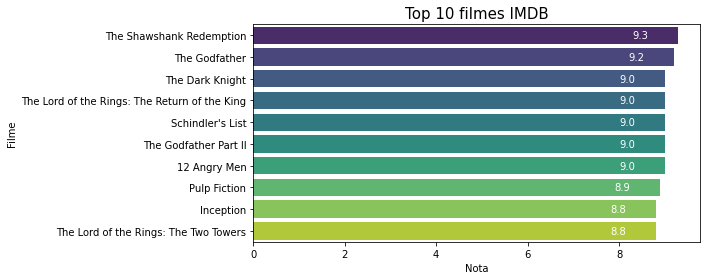

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Top 10 filmes IMDB', fontsize=15)
filmes = sns.barplot(x='Nota',y='Filme',data= movies.head(10),palette='viridis')

for p in filmes.patches:
    width = p.get_width()    #obter a largura da barra
    filmes.text(width + -1, #posicionei o texto em -1 para aparecer dentro da barra
            p.get_y() + p.get_height() / 2, # obtive a posição do Y + posição do X  / 2
            '{:1.1f}'.format(width), # Casas decimais
            ha = 'left',   # Ordenar pela horizontal
            va = 'center',# Ordenar pela vertical
            color='white') #coloquei a cor branca por causa das cores do plot
plt.show()


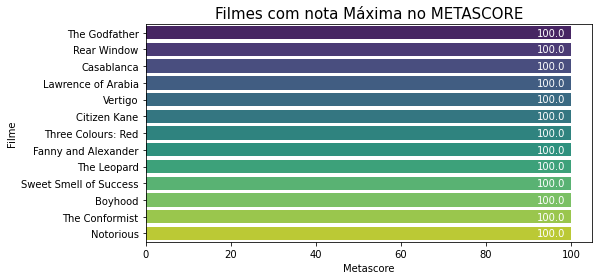

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Filmes com nota Máxima no METASCORE', fontsize=15)
metascore = sns.barplot(x='Metascore',y='Filme',data= max_meta, palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -8, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()


Apenas um filme aparece em ambas as listas, "The Godfather", podemos dizer que esse filme é o melhor filme da história, já que ele possui uma altíssima nota pelo IMDB e nota máxima no METASCORE. Se o questionamento fosse descobrir o melhor filme que agradou tanto o público quanto a crítica especializada, teríamos passado de ano, mas aqui queremos ter mais dados, queremos saber o top 10 dos filmes mais agradáveis. Gostei deste nome.

##### Top 10 Filmes mais "Agradáveis" (Crítica x Público)

In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,81.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


In [ ]:
movies['Metascore'] = movies['Metascore'] / 10

In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M


Primeiro converti o METASCORE para o mesmo padrão das notas no IMDB, agora vou criar uma coluna que será o SCORE, que vai definir o SCORE médio daquele filme e em seguida só plotar

In [ ]:
movies['Score'] = (movies['Nota'] + movies['Metascore']) / 2

In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M,8.7
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.6
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M,8.7
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.2
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.2


In [ ]:
top10_score = movies.sort_values('Score', ascending = False).head(10)

In [ ]:
top10_score.head(10)

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.60
6,7,12 Angry Men,-1957,96 min,"Crime, Drama",9.0,9.6,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"769,113",$4.36M,9.30
56,57,Casablanca,-1942,102 min,"Drama, Romance, War",8.5,10.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,"562,032",$1.02M,9.25
55,56,Rear Window,-1954,112 min,"Mystery, Thriller",8.5,10.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,"482,791",$36.76M,9.25
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.20
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.20
32,33,Seven Samurai,-1954,207 min,"Action, Drama",8.6,9.8,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,"340,610",$0.27M,9.20
58,59,City Lights,-1931,87 min,"Comedy, Drama, Romance",8.5,9.9,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,"182,312",$0.02M,9.20
121,122,Lawrence of Arabia,-1962,218 min,"Adventure, Biography, Drama",8.3,10.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,"289,377",$44.82M,9.15
8,9,Pulp Fiction,-1994,154 min,"Crime, Drama",8.9,9.4,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,"1,995,346",$107.93M,9.15


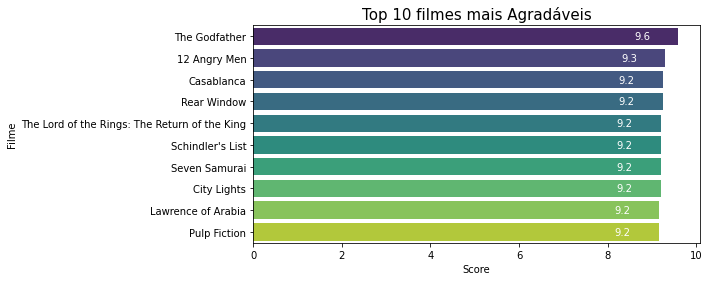

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Top 10 filmes mais Agradáveis', fontsize=15)
metascore = sns.barplot(x='Score',y='Filme',data= top10_score, palette='viridis')

for p in metascore.patches:
    width = p.get_width()   
    metascore.text(width + -1, 
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}'.format(width), 
            ha = 'left',   
            va = 'center',
            color='white') 
plt.show()

In [ ]:
movies.head(5)

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M,8.7
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.6
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M,8.7
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.2
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.2


#### Q4: Média de Avaliação por gênero (INACABADO - TBD)

O IMDB possui tags de gêneros, são no máximo 3, portanto vou criar 3 colunas: G1, G2 e G3 para separar esses gêneros

In [ ]:
split_generos = movies[['G1','G2','G3']] = movies['Genero'].str.split(',', expand = True)
split_generos.columns = ['G1','G2','G3']
split_generos.head()

,G1,G2,G3
0,Drama,None,None
1,Crime,Drama,None
2,Action,Crime,Drama
3,Action,Adventure,Drama
4,Biography,Drama,History


In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score,G1,G2,G3
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M,8.7,Drama,None,None
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.6,Crime,Drama,None
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M,8.7,Action,Crime,Drama
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.2,Action,Adventure,Drama
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.2,Biography,Drama,History


In [ ]:
media_genero = movies.groupby(['G1','G2','G3']).mean().round(2).reset_index() #estou agrupando as notas dos filmes e tirando a média de cada filme
media_genero.head()

,G1,G2,G3,Nota,Metascore,Score
0,Action,Adventure,Comedy,7.89,6.86,7.38
1,Action,Adventure,Crime,7.60,6.80,7.20
2,Action,Adventure,Drama,8.14,8.06,8.10
3,Action,Adventure,Fantasy,8.18,7.11,7.64
4,Action,Adventure,Horror,7.80,4.50,6.15


In [ ]:
movies.sort_values(['G1', 'G2']).set_index(['G1', 'G2'])


Rank                                              Filme  \
G1       G2                                                                   
Action    Adventure    4      The Lord of the Rings: The Return of the King   
          Adventure   10                                          Inception   
          Adventure   11              The Lord of the Rings: The Two Towers   
          Adventure   13  The Lord of the Rings: The Fellowship of the Ring   
          Adventure   19     Star Wars: Episode V - The Empire Strikes Back   
...                  ...                                                ...   
Thriller NaN         888                                    Wait Until Dark   
Western  NaN          54                       Once Upon a Time in the West   
         NaN         188                             For a Few Dollars More   
         NaN         444                                          Rio Bravo   
         NaN         703                             The Outlaw Josey Wales   

                       Ano    Tempo                      Genero  Nota  \
G1       G2                                                             
Action    Adventure  -2003  201 min    Action, Adventure, Drama   9.0   
          Adventure  -2010  148 min   Action, Adventure, Sci-Fi   8.8   
          Adventure  -2002  179 min    Action, Adventure, Drama   8.8   
          Adventure  -2001  178 min    Action, Adventure, Drama   8.8   
          Adventure  -1980  124 min  Action, Adventure, Fantasy   8.7   
...                    ...      ...                         ...   ...   
Thriller NaN         -1967  108 min                    Thriller   7.7   
Western  NaN         -1968  165 min                     Western   8.5   
         NaN         -1965  132 min                     Western   8.2   
         NaN         -1959  141 min                     Western   8.0   
         NaN         -1976  135 min                     Western   7.8   

                     Metascore            Diretor              Ator1  \
G1       G2                                                            
Action    Adventure        9.4      Peter Jackson        Elijah Wood   
          Adventure        7.4  Christopher Nolan  Leonardo DiCaprio   
          Adventure        8.7      Peter Jackson        Elijah Wood   
          Adventure        9.2      Peter Jackson        Elijah Wood   
          Adventure        8.2     Irvin Kershner        Mark Hamill   
...                        ...                ...                ...   
Thriller NaN               8.1      Terence Young     Audrey Hepburn   
Western  NaN               8.0       Sergio Leone        Henry Fonda   
         NaN               7.4       Sergio Leone     Clint Eastwood   
         NaN               9.3       Howard Hawks         John Wayne   
         NaN               6.9     Clint Eastwood     Clint Eastwood   

                                    Ator2               Ator3  \
G1       G2                                                     
Action    Adventure       Viggo Mortensen        Ian McKellen   
          Adventure  Joseph Gordon-Levitt         Elliot Page   
          Adventure          Ian McKellen     Viggo Mortensen   
          Adventure          Ian McKellen       Orlando Bloom   
          Adventure         Harrison Ford       Carrie Fisher   
...                                   ...                 ...   
Thriller NaN                   Alan Arkin      Richard Crenna   
Western  NaN              Charles Bronson   Claudia Cardinale   
         NaN                Lee Van Cleef  Gian Maria Volontè   
         NaN                  Dean Martin        Ricky Nelson   
         NaN                 Sondra Locke    Chief Dan George   

                                   Ator4      Votos Bilheteria_Domestic  \
G1       G2                                                               
Action    Adventure        Orlando Bloom  1,787,701            $377.85M   
          Adventure         Ken Wa

In [ ]:
media_genero

Nota  Metascore  Score
G1        G2         G3                               
Action     Adventure  Comedy    7.89       6.86   7.38
                      Crime     7.60       6.80   7.20
                      Drama     8.14       8.06   8.10
                      Fantasy   8.18       7.11   7.64
                      Horror    7.80       4.50   6.15
...                              ...        ...    ...
Film-Noir  Mystery    Thriller  8.10       9.70   8.90
Horror     Mystery    Sci-Fi    8.20       5.70   6.95
                      Thriller  7.85       7.55   7.70
Mystery    Romance    Thriller  8.30      10.00   9.15
           Sci-Fi     Thriller  8.00       7.40   7.70

[140 rows x 3 columns]

In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score,G1,G2,G3
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M,8.7,Drama,None,None
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.6,Crime,Drama,None
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M,8.7,Action,Crime,Drama
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.2,Action,Adventure,Drama
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.2,Biography,Drama,History


In [ ]:
movies.groupby(['G1', 'G2','G3']).mean().reset_index()


,G1,G2,G3,Nota,Metascore,Score
0,Action,Adventure,Comedy,7.8875,6.8625,7.37500
1,Action,Adventure,Crime,7.6000,6.8000,7.20000
2,Action,Adventure,Drama,8.1400,8.0600,8.10000
3,Action,Adventure,Fantasy,8.1750,7.1125,7.64375
4,Action,Adventure,Horror,7.8000,4.5000,6.15000
...,...,...,...,...,...,...
135,Film-Noir,Mystery,Thriller,8.1000,9.7000,8.90000
136,Horror,Mystery,Sci-Fi,8.2000,5.7000,6.95000
137,Horror,Mystery,Thriller,7.8500,7.5500,7.70000
138,Mystery,Romance,Thriller,8.3000,10.0000,9.15000


In [ ]:
movies.groupby(['G1','G2','G3']).agg('mean').sort_values('Score', ascending = False).head(10).reset_index


<bound method DataFrame.reset_index of                                 Nota  Metascore  Score
G1        G2         G3                               
Mystery    Romance    Thriller   8.3       10.0   9.15
Comedy     Musical    Romance    8.3        9.9   9.10
Action     Adventure  Mystery    8.3        9.8   9.05
Comedy     Music      Romance    8.2        9.8   9.00
Drama      Fantasy    War        8.2        9.8   9.00
           Mystery    War        8.5        9.4   8.95
Animation  Drama      War        8.5        9.4   8.95
Drama      Film-Noir  Romance    7.9       10.0   8.95
Film-Noir  Mystery    Thriller   8.1        9.7   8.90
Action     Adventure  Romance    7.9        9.7   8.80>

In [ ]:
 movies.groupby(['G1', 'G2','G3'], axis=0, as_index=False).mean().sort_values('Score', ascending = False).head(10).reset_index()

,index,G1,G2,G3,Nota,Metascore,Score
0,138,Mystery,Romance,Thriller,8.3,10.0,9.15
1,89,Comedy,Musical,Romance,8.3,9.9,9.10
2,5,Action,Adventure,Mystery,8.3,9.8,9.05
3,88,Comedy,Music,Romance,8.2,9.8,9.00
4,108,Drama,Fantasy,War,8.2,9.8,9.00
5,126,Drama,Mystery,War,8.5,9.4,8.95
6,64,Animation,Drama,War,8.5,9.4,8.95
7,110,Drama,Film-Noir,Romance,7.9,10.0,8.95
8,135,Film-Noir,Mystery,Thriller,8.1,9.7,8.90
9,6,Action,Adventure,Romance,7.9,9.7,8.80


In [ ]:
movies.head()

,Rank,Filme,Ano,Tempo,Genero,Nota,Metascore,Diretor,Ator1,Ator2,Ator3,Ator4,Votos,Bilheteria_Domestic,Score,G1,G2,G3
0,1,The Shawshank Redemption,-1994,142 min,Drama,9.3,8.1,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M,8.7,Drama,None,None
1,2,The Godfather,-1972,175 min,"Crime, Drama",9.2,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M,9.6,Crime,Drama,None
2,3,The Dark Knight,-2008,152 min,"Action, Crime, Drama",9.0,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,574,810",$534.86M,8.7,Action,Crime,Drama
3,4,The Lord of the Rings: The Return of the King,-2003,201 min,"Action, Adventure, Drama",9.0,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,787,701",$377.85M,9.2,Action,Adventure,Drama
4,5,Schindler's List,-1993,195 min,"Biography, Drama, History",9.0,9.4,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,"1,323,776",$96.90M,9.2,Biography,Drama,History


In [ ]:
movies[movies['G1'] == movies['G2']]['G3']


Series([], Name: G3, dtype: object)

In [ ]:
media_genero2 = media_genero.head().reset_index()

In [ ]:
media_genero2.head()

,index,G1,G2,G3,Nota,Metascore,Score
0,0,Action,Adventure,Comedy,7.89,6.86,7.38
1,1,Action,Adventure,Crime,7.60,6.80,7.20
2,2,Action,Adventure,Drama,8.14,8.06,8.10
3,3,Action,Adventure,Fantasy,8.18,7.11,7.64
4,4,Action,Adventure,Horror,7.80,4.50,6.15


In [ ]:
agrupado_g = movies.groupby('G1').agg({'Score': ['mean', 'min', 'max']})

print(agrupado_g)

              Score            
               mean   min   max
G1                             
Action     7.705298  5.65  9.20
Adventure  7.989286  6.75  9.15
Animation  8.016883  6.85  9.10
Biography  7.808553  6.30  9.20
Comedy     7.869919  6.10  9.20
Crime      7.927222  6.20  9.60
Drama      7.997468  5.20  9.25
Family     7.250000  7.25  7.25
Fantasy    7.100000  7.10  7.10
Film-Noir  8.750000  8.60  8.90
Horror     7.916667  6.10  9.10
Mystery    8.391667  7.25  9.25
Thriller   7.900000  7.90  7.90
Western    8.012500  7.35  8.65


In [ ]:
media_genero = movies.groupby(['G1','G2','G3']).mean().round(2).reset_index() #estou agrupando as notas dos filmes e tirando a média de cada filme
media_genero.head()

In [ ]:
media_genero1 = movies.groupby(['G1']).mean().round(2).reset_index() #estou agrupando as notas dos filmes e tirando a média de cada filme
media_genero1.head()

,G1,Nota,Metascore,Score
0,Action,7.96,7.45,7.71
1,Adventure,7.96,8.01,7.99
2,Animation,7.93,8.10,8.02
3,Biography,7.94,7.67,7.81
4,Comedy,7.87,7.87,7.87


In [ ]:
media_genero2 = movies.groupby(['G2']).mean().round(2).reset_index() #estou agrupando as notas dos filmes e tirando a média de cada filme
media_genero2.head()

,G2,Nota,Metascore,Score
0,Action,7.90,7.63,7.76
1,Adventure,7.97,7.77,7.87
2,Biography,7.92,7.94,7.93
3,Comedy,7.89,7.68,7.79
4,Crime,7.90,7.44,7.67


In [ ]:
media_genero3 = movies.groupby(['G3']).mean().round(2).reset_index() #estou agrupando as notas dos filmes e tirando a média de cada filme
media_genero3.head()

,G3,Nota,Metascore,Score
0,Adventure,7.90,7.83,7.87
1,Comedy,7.89,7.90,7.90
2,Crime,7.88,7.22,7.55
3,Drama,7.97,7.75,7.86
4,Family,7.93,7.83,7.88


In [ ]:
agrupado_genero= pd.concat([media_genero1,media_genero2,media_genero3], axis=0, keys=['G1','G2','G3']).reset_index()


In [ ]:
agrupado_genero.head()

,level_0,level_1,G1,Nota,Metascore,Score,G2,G3
0,G1,0,Action,7.96,7.45,7.71,NaN,NaN
1,G1,1,Adventure,7.96,8.01,7.99,NaN,NaN
2,G1,2,Animation,7.93,8.10,8.02,NaN,NaN
3,G1,3,Biography,7.94,7.67,7.81,NaN,NaN
4,G1,4,Comedy,7.87,7.87,7.87,NaN,NaN


In [ ]:
media_g = agrupado_genero.groupby(['G1').agg({'Score': ['mean']})

print(media_g)

          Score
           mean
G1             
Action     7.71
Adventure  7.99
Animation  8.02
Biography  7.81
Comedy     7.87
Crime      7.93
Drama      8.00
Family     7.25
Fantasy    7.10
Film-Noir  8.75
Horror     7.92
Mystery    8.39
Thriller   7.90
Western    8.01
